In [1]:
import pandas as pd
inputfile = 'attrsConstruction.xlsx'
#由于ARIMA 模型对时间序列的要求是平稳型，需要进行平稳性检验
data = pd.read_excel(inputfile)
df = data.iloc[:len(data)-5]# 不使用最后5个数
diff = 0


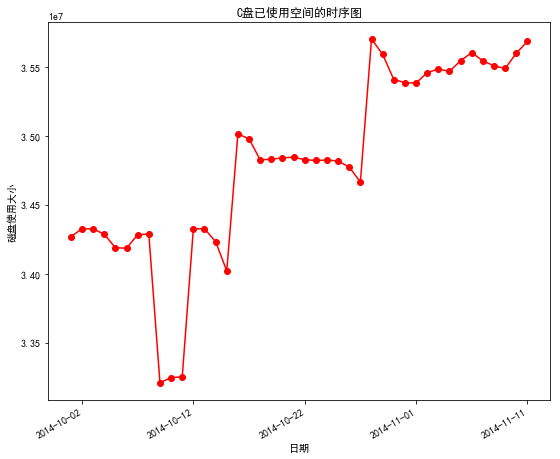

In [2]:
# 方法一----------------时间序列图法
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(9,7))
import datetime
import matplotlib.dates as mdates
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']= False

fig  = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title(u"C盘已使用空间的时序图")
# ax.set_xlabel(u'日期')
ax.set(xlabel=u'日期',ylabel=u'磁盘使用大小')
# 图上时间间隔显示为10天
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=range(1,32), interval=10)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.subplots_adjust(bottom=0.13,top=0.95)
ax.plot(df['COLLECTTIME'],df['CWXT_DB:184:C:\\'],'ro-',)

fig.autofmt_xdate() #自动根据标签长度进行旋转
'''for label in ax.xaxis.get_ticklabels():   #此语句完成功能同上
       label.set_rotation(45)
'''
# plt.savefig('d.jpg')
plt.show()
# data
# 由图可知，该序列值不平稳（若平稳，会围绕某值上下晃动）

In [3]:

# 方法二----------------：单位根检验（ADF）

# # 方法：采用单位根检验（ADF）的方法或者时序图的方法（见数据探索模块）
# from statsmodels.tsa.stattools import adfuller as ADF
# 判断D盘数据的平稳性，以及确定几次差分后平稳
# x = ADF(df['CWXT_DB:184:C:\\'])
# print x 


# 方法三----------------游程检验
from statsmodels.sandbox.stats.runs import runstest_1samp as RSS
x = RSS(df['CWXT_DB:184:C:\\'])
print x


# 方法四----------------自相关系数法
# from statsmodels.tsa.stattools import acf as ACF
# x = ACF(df['CWXT_DB:184:C:\\'])
# print x

while x[1] >= 0.05 : # adf[1]是p值，p值小于0.05认为是平稳的
    print x[1]
    diff = diff + 1
#     x = ADF(df['CWXT_DB:184:C:\\'].diff(diff).dropna())#注意，差分后使用ADF检验时，必须去掉空值
    x = RSS(df['CWXT_DB:184:C:\\'].diff(diff).dropna())#注意，差分后使用RSS检验时，必须去掉空值
#     x = ACF(df['CWXT_DB:184:C:\\'].diff(diff).dropna())#注意，差分后使用ACF(自相关系数）检验时，必须去掉空值
    
print (u'原始序列经过%s阶差分后归于平稳，p值为%s') % (diff, x[1])

# df['CWXT_DB:184:C:\\_x'] = df['CWXT_DB:184:C:\\'].diff(1)

(-5.431654160478633, 5.5834051354053017e-08)
原始序列经过0阶差分后归于平稳，p值为5.58340513541e-08


D:\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


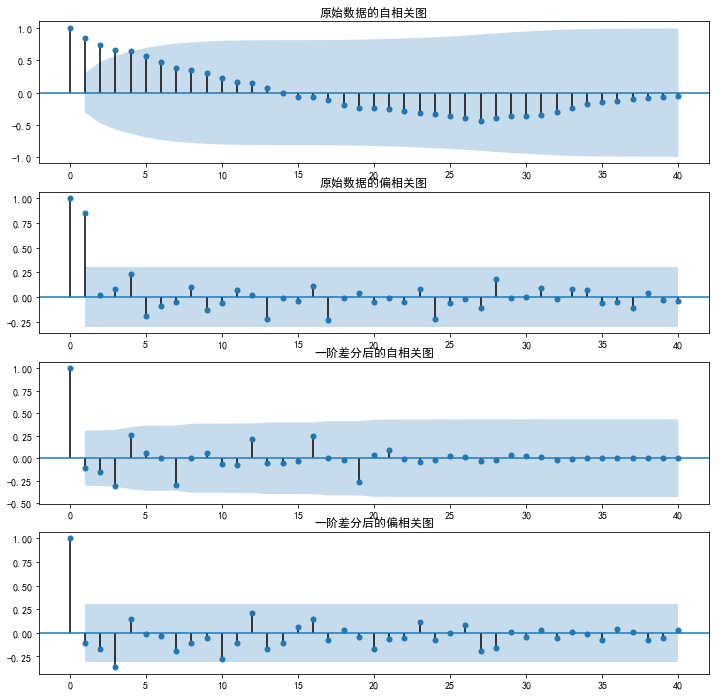

In [4]:
# 方法五-------通过自相关和偏相关图判定平稳性，并确定所用模型(******)

# 如果自相关是拖尾，偏相关截尾，则用 AR 算法
# 如果自相关截尾，偏相关拖尾，则用 MA 算法
# 如果自相关和偏相关都是拖尾，则用 ARMA 算法， ARIMA 是 ARMA 算法的扩展版，用法类似 。

# 通过自相关图可以发现，该图自相关和偏相关都是拖尾，因此，确定是ARMA算法，或者ARIMA算法

# 查看是否序列平稳 自相关图法/时间序列的散点图
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
dta = df['CWXT_DB:184:C:\\']
 # 原数据的的自相关图与偏自相关图
fig = plt.figure(figsize=(12,12))
ax1=fig.add_subplot(411)# 自相关图
fig = sm.graphics.tsa.plot_acf(dta,lags=40,ax=ax1)
ax1.set_title(u'原始数据的自相关图')

ax2 = fig.add_subplot(412)# 篇自相关图
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)
ax2.set_title(u'原始数据的偏相关图')

# 一阶差分后的自相关图与偏自相关图
dta= dta.diff(1).dropna() # 注意一定要将查分后的空值去掉再取自相关系数
ax3=fig.add_subplot(413)# 自相关图
fig = sm.graphics.tsa.plot_acf(dta,lags=40,ax=ax3)
ax3.set_title(u'一阶差分后的自相关图')

ax4 = fig.add_subplot(414)# 篇自相关图
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax4)
ax4.set_title(u'一阶差分后的偏相关图')
plt.savefig('acf_pacf.jpg')
plt.show()